<a href="https://colab.research.google.com/github/LKVan/TLTN/blob/main/Dataset_flickr8kimagescaptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kết nối google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import thư viện**

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import shutil

**Tạo thư mục .kaggle**

In [ ]:
os.makedirs('/root/.kaggle', exist_ok=True)
!cp /content/drive/MyDrive/TLTN_LeKhanhVan_2024/kaggle.json /root/.kaggle/

**Cấp quyền truy cập**

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

**Tải dataset**

In [ ]:
!kaggle datasets download -d aladdinpersson/flickr8kimagescaptions

Dataset URL: https://www.kaggle.com/datasets/aladdinpersson/flickr8kimagescaptions
License(s): unknown
flickr8kimagescaptions.zip: Skipping, found more recently modified local copy (use --force to force download)


**upzip dataset**

In [ ]:
import zipfile

with zipfile.ZipFile('flickr8kimagescaptions.zip', 'r') as zip_ref:
    zip_ref.extractall('flickr8k')

**Kiểm tra dữ liệu**

In [ ]:
data = pd.read_csv('flickr8k/flickr8k/captions.txt')
data.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


**Tiền xử lí dữ liệu**

In [ ]:
nltk.download('stopwords')
def preprocess_text(text):
    # Chuyển thành chữ thường
    text = text.lower()
    # Xóa dấu câu và ký tự đặc biệt
    text = re.sub(r'[^\w\s]', '', text)
    # Xóa stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

data['caption'] = data['caption'].apply(preprocess_text)

image_folder = 'flickr8k/flickr8k/images'
images = os.listdir(image_folder)
images.sort()
data = data[data['image'].isin(images)]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Chia dữ liệu**

In [ ]:
captions_df = pd.DataFrame(data)
captions_dict = captions_df.groupby('image')['caption'].apply(list).to_dict()

grouped_df = pd.DataFrame(list(captions_dict.items()), columns=['image', 'captions'])

x_train, x_test = train_test_split(grouped_df, test_size=0.2, random_state=42)

y_train = x_train['captions'].tolist()
y_test = x_test['captions'].tolist()


len(x_train),len(x_test)

(6472, 1619)

**Chuẩn hóa dữ liệu**

In [ ]:
image_folder = 'flickr8k/flickr8k/images'
output_folder = 'flickr8k/flickr8k/resized_images'

os.makedirs(output_folder, exist_ok=True)

target_size = (224, 224)

for filename in os.listdir(image_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        input_path = os.path.join(image_folder, filename)
        output_path = os.path.join(output_folder, filename)

        try:
            with Image.open(input_path) as img:
                img = img.resize(target_size, Image.LANCZOS)
                img.save(output_path)
        except Exception as e:
            print(f"Error processing {filename}: {e}")

len(os.listdir(output_folder))


8091

**Chia dữ liệu ảnh**

In [ ]:
train_folder = 'flickr8k/flickr8k/train_images'
test_folder = 'flickr8k/flickr8k/test_images'

if os.path.exists(train_folder):
    shutil.rmtree(train_folder)
os.makedirs(train_folder, exist_ok=True)

# Di chuyển hình ảnh vào thư mục train_images
for filename in x_train['image'].tolist():
    src_path = os.path.join(output_folder, filename)
    if os.path.exists(src_path):
        shutil.move(src_path, os.path.join(train_folder, filename))


# Di chuyển hình ảnh vào thư mục test_images
for filename in x_test['image'].tolist():
    src_path = os.path.join(output_folder, filename)
    if os.path.exists(src_path):
        shutil.move(src_path, os.path.join(test_folder, filename))


# Kiểm tra kích thước của các thư mục
len(os.listdir(train_folder)),len(os.listdir(test_folder)),len(os.listdir(output_folder))


(6472, 1620, 0)

**Hiển thị một số ảnh trong tập train**

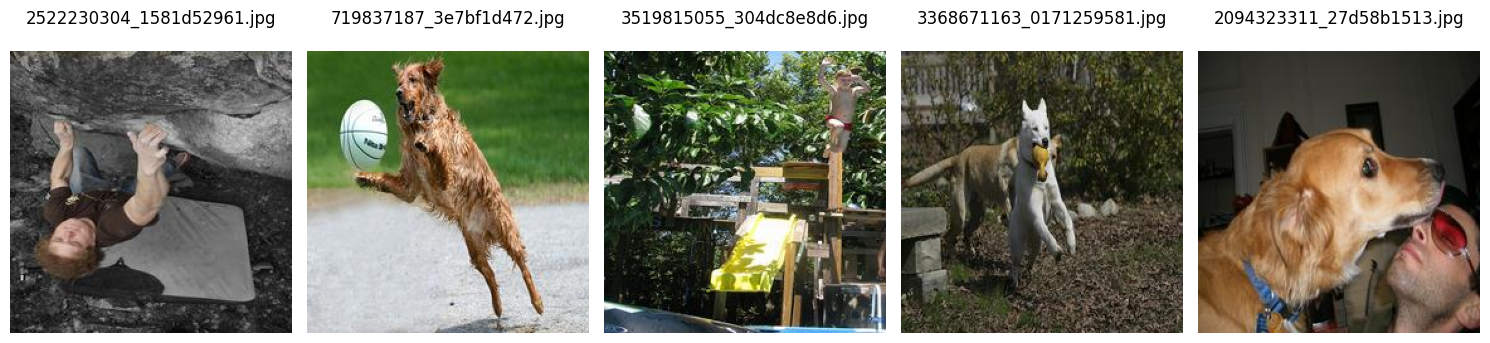

In [ ]:
train_images = os.listdir(train_folder)

# Số ảnh muốn hiển thị
num_images_to_display = 5
selected_images = train_images[:num_images_to_display]

plt.figure(figsize=(15, 10))

for i, image_name in enumerate(selected_images):
    img_path = os.path.join(train_folder, image_name)
    img = mpimg.imread(img_path)

    # Sắp xếp hình theo hàng
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    # Thêm khoảng cách dưới tiêu đề
    plt.title(image_name, pad=20)
    # Tắt trục
    plt.axis('off')

# Tự động điều chỉnh khoảng cách
plt.tight_layout()
plt.show()



****